In [1]:
import pandas as pd

df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [7]:
x = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
y = df['body_shape']

### x의 표준편차 행렬

In [18]:
from sklearn.preprocessing import StandardScaler

x_std = StandardScaler().fit_transform(x)
print(x_std)

[[-1.35205803  0.         -1.3764944  -1.28571429  1.        ]
 [ 0.01711466  0.         -0.22941573  0.14285714  0.        ]
 [ 0.61612771  1.29099445  0.91766294  0.14285714 -1.        ]
 [-1.18091145 -1.29099445 -0.22941573 -1.28571429  2.        ]
 [ 1.89972711  1.29099445  0.91766294  1.57142857 -1.        ]
 [-1.26648474 -1.29099445 -1.3764944   0.14285714  1.        ]
 [ 0.18826125  0.         -1.3764944   0.14285714  0.        ]
 [ 1.04399418  1.29099445  0.91766294  1.57142857 -1.        ]
 [-0.15403193 -1.29099445  0.91766294 -1.28571429 -1.        ]
 [ 0.18826125  0.          0.91766294  0.14285714  0.        ]]


### 공분산 행렬

In [19]:
import numpy as np
features = x_std.T
x_cov_mat = np.cov(features)
print(x_cov_mat)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [22]:
x_std.T.dot(x_std)/9.0

array([[False,  True, False,  True,  True],
       [ True,  True, False,  True, False],
       [False, False, False,  True, False],
       [ True,  True,  True,  True, False],
       [ True, False, False, False,  True]])

### 고유 벡터 찾기

In [25]:
eig_vals, eig_vecs = np.linalg.eig(x_cov_mat)
print('eig val: \n', eig_vals)
print('eig vecs: \n', eig_vecs)

eig val: 
 [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]
eig vecs: 
 [[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


##### eig_vals[0]이 전체 중 73%

In [26]:
eig_vals[0]/sum(eig_vals)

0.7318321731427544

### 주축에 투영하기

In [34]:
# 1주축 투영
projected_x = x_std.dot(eig_vecs.T[0])
print(projected_x)
result = pd.DataFrame(projected_x, columns = ['PC1'])
result['y-axis'] = 0.0
result['label'] = y
result

[ 2.22600943  0.0181432  -1.76296611  2.73542407 -3.02711544  2.14702579
  0.37142473 -2.59239883  0.39347815 -0.50902498]


,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


/Users/ryleyun/opt/anaconda3/envs/nlppython/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA result')

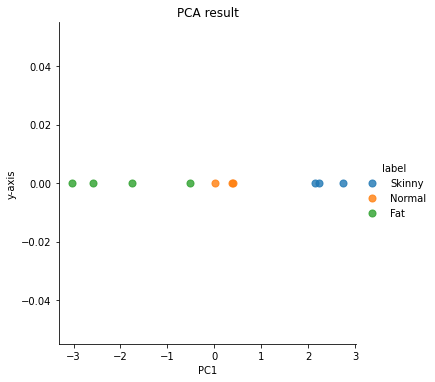

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot("PC1", "y-axis", data=result, fit_reg=False, scatter_kws = {"s":50}, hue='label')
plt.title('PCA result')

### 한방에!

In [43]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)
sklearn_pca_x

array([[-2.22600943],
       [-0.0181432 ],
       [ 1.76296611],
       [-2.73542407],
       [ 3.02711544],
       [-2.14702579],
       [-0.37142473],
       [ 2.59239883],
       [-0.39347815],
       [ 0.50902498]])

/Users/ryleyun/opt/anaconda3/envs/nlppython/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA result')

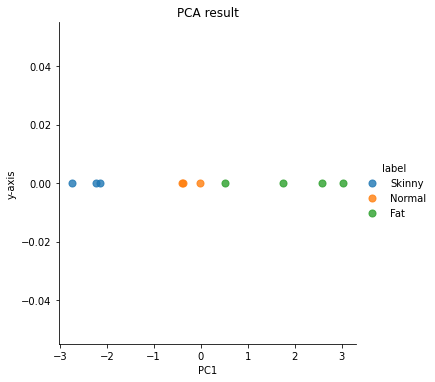

In [45]:
pca_result = pd.DataFrame(sklearn_pca_x, columns=["PC1"])
pca_result['y-axis'] = 0.0
pca_result['label'] = y 

sns.lmplot("PC1", "y-axis", data=pca_result, fit_reg=False, scatter_kws = {"s":50}, hue='label')
plt.title('PCA result')

In [56]:
pca = decomposition.PCA(n_components=2)
sklearn_pca_x = pca.fit_transform(x_std)
sklearn_pca_x

array([[-2.22600943, -0.54936514],
       [-0.0181432 , -0.23871898],
       [ 1.76296611,  0.36868681],
       [-2.73542407,  0.4544983 ],
       [ 3.02711544, -0.41305057],
       [-2.14702579, -0.83449111],
       [-0.37142473, -1.05380594],
       [ 2.59239883, -0.3985085 ],
       [-0.39347815,  2.09420397],
       [ 0.50902498,  0.57055116]])

/Users/ryleyun/opt/anaconda3/envs/nlppython/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


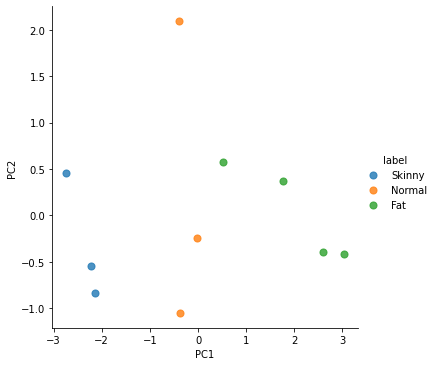

In [59]:
pca_result = pd.DataFrame(sklearn_pca_x, columns=['PC1', 'PC2'])
pca_result['label'] = y

sns.lmplot('PC1', 'PC2', data=pca_result, fit_reg=False, scatter_kws = {"s":50}, hue='label')

### SVD

In [1]:
import numpy as np

In [2]:
A = np.array([[1, 0, 0, 0, 2],
              [0, 0, 3, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 2, 0, 0, 0]
              ])

In [4]:
U, s, VT = np.linalg.svd(A)

print(f"U: \n{U}\n")
print(f"s: \n{s}\n")
print(f"VT: \n{VT}")

U: 
[[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]]

s: 
[3.         2.23606798 2.         0.        ]

VT: 
[[-0.          0.          1.         -0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [-0.          1.          0.         -0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


### 이미지 줄여보기

(8256, 5504)


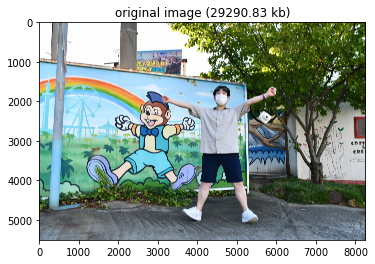

In [9]:
import os
from PIL import Image
import matplotlib.pyplot as plt

path = "./YGY_3795.JPG"

img = Image.open(path)

s = float(os.path.getsize(path))/1000
print(img.size)
plt.title("original image ({:.2f} kb)".format(s))
plt.imshow(img)

In [16]:
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band = 0)), float)

In [24]:
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
imgmat.shape

(5504, 8256)

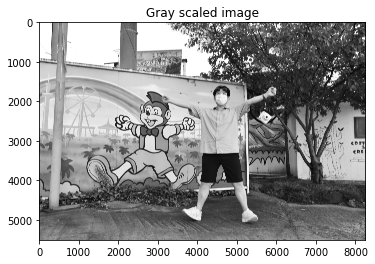

In [26]:
plt.figure()
plt.imshow(imgmat, cmap='gray')
plt.title("image after ")
plt.show()

In [27]:
U, S, Vt = np.linalg.svd(imgmat)
S.shape

(5504,)

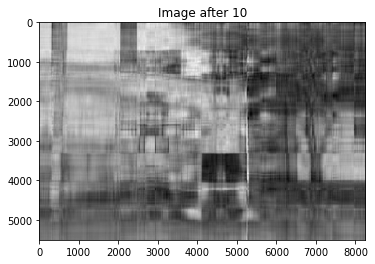

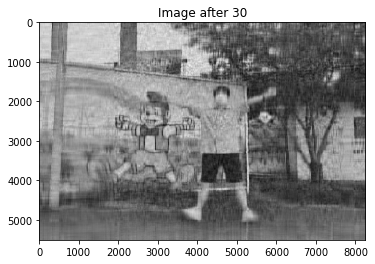

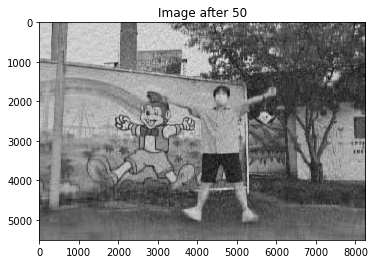

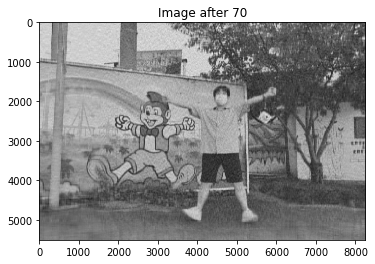

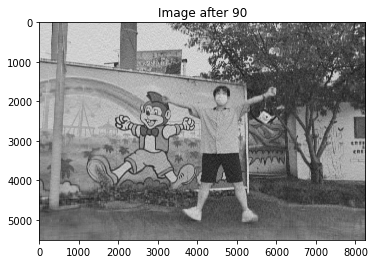

In [37]:
for i in range(10, 101, 20):
    cmpimg = np.matrix(U[:, :i] * np.diag(S[:i])*np.matrix(Vt[:i, :]))
    plt.imshow(cmpimg, cmap='gray')
    title = "Image after {}".format(i)
    plt.title(title)
    plt.show()
    result = Image.fromarray((cmpimg).astype(np.uint8))

## 토픽 모델링(LSA)

In [46]:
import matplotlib.pyplot as plt


docs = ['바나나 사과 포도 포도 짜장면',
         '사과 포도',
         '포도 바나나',
         '짜장면 짬뽕 탕수육',
         '볶음밥 탕수육',
         '짜장면 짬뽕',
         '라면 스시',
         '스시 짜장면',
         '가츠동 스시 소바',
         '된장찌개 김치찌개 김치',
         '김치 된장 짜장면',
         '비빔밥 김치']

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

n_topic = 4

# tfidf는 dtm으로 결과 줌
tfidf_vect = TfidfVectorizer(max_df = 0.75)
tfidf = tfidf_vect.fit_transform(docs)
svd = TruncatedSVD(n_components=n_topic, n_iter=100)

U = svd.fit_transform(tfidf)
Vt = svd.components_

In [74]:
vocab = tfidf_vect.get_feature_names()
n = 4
for i, topic in enumerate(Vt):
    print(f"Topic {i+1}:", [(vocab[i], topic[i].round(3)) for i in topic.argsort()[:-n-1:-1]])

Topic 1: [('포도', 0.583), ('짜장면', 0.499), ('바나나', 0.33), ('사과', 0.33)]
Topic 2: [('짜장면', 0.44), ('짬뽕', 0.391), ('스시', 0.315), ('탕수육', 0.239)]
Topic 3: [('스시', 0.703), ('라면', 0.353), ('소바', 0.253), ('가츠동', 0.253)]
Topic 4: [('김치', 0.682), ('비빔밥', 0.373), ('김치찌개', 0.272), ('된장찌개', 0.272)]


In [75]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def calc_similarity_matrix(vectors):
    def cosine_similarity(a, b):
        return dot(a,b)/(norm(a)*norm(b))
    
    n_word = len(vectors)
    similariy_matrix = np.zeros((n_word, n_word))
    
    for i in range(n_word):
        for j in range(n_word):
            similariy_matrix[j,i] = cosine_similarity(vectors[i], vectors[j]).round(4)
            
    return similariy_matrix

In [76]:
word_vectors = Vt.T
word_similarity_matrix = calc_similarity_matrix(word_vectors)

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize(similarity_matrix, label):
    mask = np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
    plt.rcParams['figure.figsize'] = [8,6]
    plt.rc('font', family="AppleGothic")
    ax = sns.heatmap(similarity_matrix, mask=mask, xticklabels=label, yticklabels=label,
                    annot=True, fmt=".2f", annot_kws={'size':8}, cmap='coolwarm')

/Users/ryleyun/opt/anaconda3/envs/nlppython/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ryleyun/opt/anaconda3/envs/nlppython/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


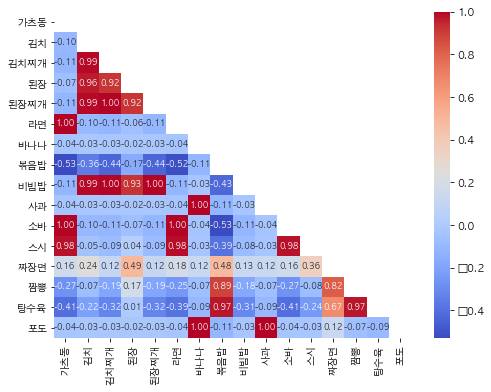

In [89]:
visualize(word_similarity_matrix, vocab)

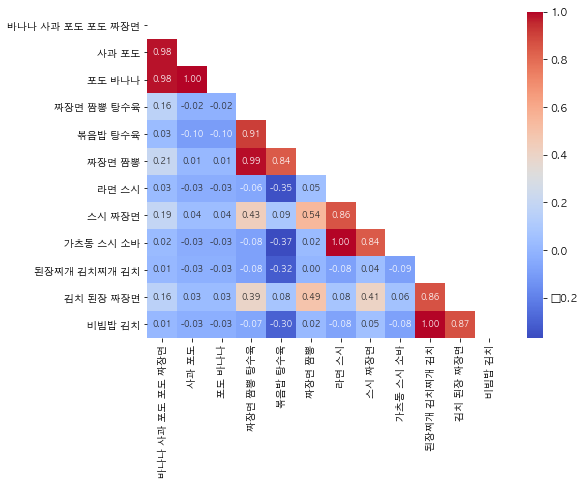

In [92]:
doc_similarity_matrix = calc_similarity_matrix(U)
visualize(doc_similarity_matrix, docs)

## TSNE (word embedding에 많이 쓰임)

In [99]:
from sklearn.manifold import TSNE

def visualize_vectors(vectors, labels):
    tsne = TSNE(n_components=2, n_iter=10000, perplexity=2)
    np.set_printoptions(suppress=True)
    T = tsne.fit_transform(vectors)

    plt.figure(figsize=(10, 6))
    plt.scatter(T[:,0], T[:, 1], c='orange', edgecolors='r')
    for label, x, y in zip(labels, T[:,0], T[:, 1]):
        plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

/Users/ryleyun/opt/anaconda3/envs/nlppython/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ryleyun/opt/anaconda3/envs/nlppython/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


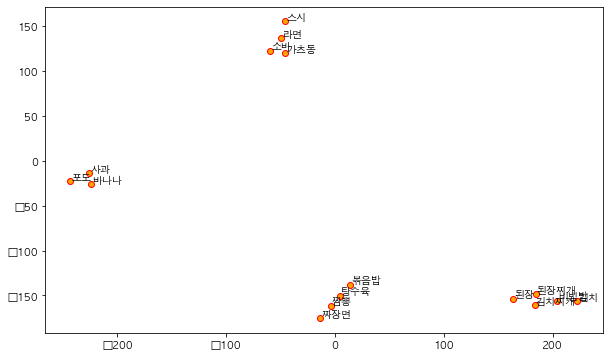

In [101]:
visualize_vectors(word_vectors, vocab)

## LDA

In [19]:
import enum
import random
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, porter
from nltk.corpus import stopwords
from collections import defaultdict

topic_indices = [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]

doc_ls = ["Cute kitty", 
"Eat rice or cake", 
"Kitty and hamster",
"Eat bread", 
"Rice, bread and cake", 
"Cute hamster eats bread and cake"]

In [28]:
class LDA:
    def __init__(self, docs, topic_num, alpha=0.1, beta=0.001):
        self.alpha = alpha
        self.beta = beta
        self.k = topic_num
        self.docs = docs

        
    def randomly_analysis_topic (self):
        dic = defaultdict()
        t2i = defaultdict(lambda: len(t2i))
        i2t = defaultdict()

        porter = PorterStemmer()
        stopword = stopwords.words('english')
        stopword.append(',')
        index = 0
        for d, tokens in enumerate([word_tokenize(doc) for doc in self.docs]):
            for w, token in enumerate([porter.stem(token.lower()) for token in tokens if token not in stopword]):
                i2t[t2i[token]]= token
                dic[(d, t2i[token], w)] = topic_indices[index]
                # dic[(d, t2i[token], w)] = random.randint(0, self.k -1)
                index += 1

        return dic, t2i, i2t

    
    def count_doc_topic(self, term_topic, t2i):
        docs = np.zeros((self.k, len(self.docs)))
        terms = np.zeros((self.k, len(t2i)))

        docs.fill(self.alpha)
        terms.fill(self.beta)

        for (d, n, w) in term_topic.keys():
            topic = term_topic[(d, n, w)]
            docs[topic, d] += 1
            terms[topic, n] += 1

        print(docs)
        print(terms)

        return docs, terms


    def iterate_assign_topic(self, term_topic, docs, terms, i2t):
        prev = {}

        while prev != term_topic:
            for (d, n, w) in term_topic:
                topic = [0, 0]

                docs[term_topic[(d, n, w)], d] -= 1
                terms[term_topic[(d, n, w)], n] -= 1

                prev = term_topic

                for t in range(self.k):
                    p_t_d = docs[t, d] /docs[:, d].sum()
                    p_w_t = terms[t, n] / terms[t, :].sum()
                    prob = p_t_d * p_w_t

                    if topic[1] < prob:
                        topic = [t, prob]


                term_topic[(d, n, w)] = topic[0]
                docs[topic[0], d] += 1
                terms[topic[0], n] += 1

        return terms


    def topic_modeling(self, count=3):
        term_topic, t2i, i2t = self.randomly_analysis_topic()
        docs, terms  = self.count_doc_topic(term_topic, t2i)
        terms = self.iterate_assign_topic(term_topic, docs, terms, i2t)

        score = terms / terms.sum(axis=1, keepdims=True)

        for i in range(self.k):
            print(f"topic {i}",)
            sorted_index = np.flip(np.argsort(score[i]), 0)[:count]
            for j in sorted_index:
                print("({}, {})".format(i2t[j], score[i, j].round(3)), end=" ")

            print("")

In [29]:
lda = LDA(doc_ls, 2)
lda.topic_modeling(3)

[[1.1 2.1 0.1 2.1 2.1 2.1]
 [1.1 1.1 2.1 0.1 1.1 3.1]]
[[1.001e+00 1.000e-03 2.001e+00 1.001e+00 3.001e+00 1.000e-03 2.001e+00]
 [1.001e+00 2.001e+00 1.001e+00 1.001e+00 1.000e-03 2.001e+00 1.001e+00]]
topic 0
(bread, 0.273) (cake, 0.273) (eat, 0.273) 
topic 1
(hamster, 0.333) (kitti, 0.333) (cute, 0.333) 


## 모듈 불러와 LDA

In [33]:
#pip install pyLDAvis

In [27]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=42, remove=('header', 'footer', 'quotes'))

In [39]:
#pip install spacy
#!python -m spacy download en_core_web_sm

In [40]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [45]:
def cleansing(text):
    result = ""
    if text:
        doc = nlp(text)
        result = " ".join([token.lemma_ for token in doc if token.is_stop==False and token.tag_[0] == 'N'])
        return result
    
    return result

In [46]:
import pandas as pd

news_df = pd.DataFrame({"document":dataset.data})
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
news_df['clean_doc'] = news_df["clean_doc"].apply(lambda x: " ".join([w.lower() for w in x.split() if len(w)>3]))
news_df['clean_doc'] = news_df['clean_doc'].apply(cleansing)

<ipython-input-46-b615b3499000>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")


In [47]:
def my_tokenizer(text):
    return text.split()

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tfdif_vect = TfidfVectorizer(tokenizer=my_tokenizer)
tfidf = tfdif_vect.fit_transform(news_df['clean_doc'])
lda = LatentDirichletAllocation(n_components=20, max_iter=20, learning_method='online', random_state=42)
lda_output = lda.fit_transform(tfidf)

In [53]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfdif_vect, mds="tsne")
pyLDAvis.display(vis)

/Users/ryleyun/opt/anaconda3/envs/nlppython/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

def tuning_hyperparams(train_data, n_jobs=1) :                
    lda_pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(tokenizer = my_tokenizer)),
                              ('lda', LatentDirichletAllocation(max_iter=10, random_state=100))])
    
    search_params = {'tfidf_vect__ngram_range': [(1, 1), (1, 2)],
                    'lda__n_components': [5, 10, 20]}
    
    gs_lda = GridSearchCV(lda_pipeline, search_params, n_jobs=n_jobs)
    gs_lda = gs_lda.fit(train_data)
    
    print("Best score: {0}".format(gs_lda.best_score_))  
    print("Best parameters set:")  
    
    best_parameters = gs_lda.best_estimator_.get_params()  
    
    
    for param_name in sorted(list(best_parameters.keys())):  
        print("\t{0}: {1}".format(param_name, best_parameters[param_name]))
        
    return gs_lda.best_estimator_


lda_pipeline = tuning_hyperparams(news_df['clean_doc'])

Best score: -136544.98478985808
Best parameters set:
	lda: LatentDirichletAllocation(n_components=5, random_state=100)
	lda__batch_size: 128
	lda__doc_topic_prior: None
	lda__evaluate_every: -1
	lda__learning_decay: 0.7
	lda__learning_method: batch
	lda__learning_offset: 10.0
	lda__max_doc_update_iter: 100
	lda__max_iter: 10
	lda__mean_change_tol: 0.001
	lda__n_components: 5
	lda__n_jobs: None
	lda__perp_tol: 0.1
	lda__random_state: 100
	lda__topic_word_prior: None
	lda__total_samples: 1000000.0
	lda__verbose: 0
	memory: None
	steps: [('tfidf_vect', TfidfVectorizer(tokenizer=<function my_tokenizer at 0x7fdf2bd13d30>)), ('lda', LatentDirichletAllocation(n_components=5, random_state=100))]
	tfidf_vect: TfidfVectorizer(tokenizer=<function my_tokenizer at 0x7fdf2bd13d30>)
	tfidf_vect__analyzer: word
	tfidf_vect__binary: False
	tfidf_vect__decode_error: strict
	tfidf_vect__dtype: <class 'numpy.float64'>
	tfidf_vect__encoding: utf-8
	tfidf_vect__input: content
	tfidf_vect__lowercase: True
	t

In [60]:
tfidf_vect = lda_pipeline.named_steps['tfidf_vect']
tfidf = tfidf_vect.fit_transform(news_df['clean_doc'])
lda = lda_pipeline.named_steps['lda']
vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect, mds='tsne')
pyLDAvis.display(vis)

/Users/ryleyun/opt/anaconda3/envs/nlppython/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
